In [1]:
# Adding libraries
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('FuelConsumption.csv')
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',
          'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


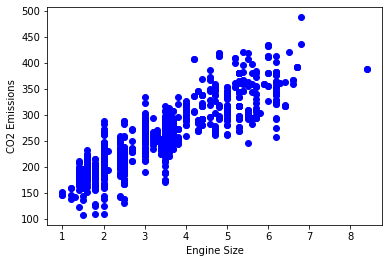

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

In [8]:
# Splitting data into training and testing Samples
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Polynomial regression (Special case of multiple linear regression)
##### When trend of data is not really linear and looks curvy, we use polynomial regression model
$y= b + \theta_1x + \theta_2x^2$
- By applying degreee = 2 we are creating
- $y = b + \theta_1 x_1 + \theta_2 x_2$

In [17]:
# Using PolynomialFeatures()
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [18]:
# Now data set is transformed into a linear scale, we can solve the same way as linear regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
## Finding parameters
print('Coefficient: ', clf.coef_ )
print('Intercepts: ', clf.intercept_)

Coefficient:  [[ 0.         48.52777663 -1.27061976]]
Intercepts:  [110.80818054]


Text(0, 0.5, 'CO2 Emissions')

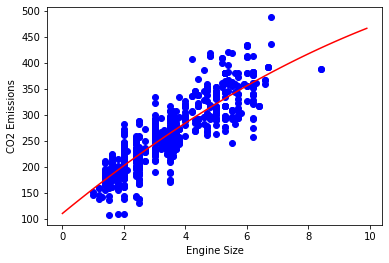

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0,10.0,0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [28]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean(test_y_ - test_y)**2)
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 24.20
Residual sum of squares (MSE): 0.99
R2-score: 0.68


Coefficients:  [[ 0.         25.69559864  4.99233898 -0.51645433]]
Intercepts:  [135.12590458]
Mean absolute error: 24.23
Residual Sum of Squares: 1.24
R2-score: 0.69


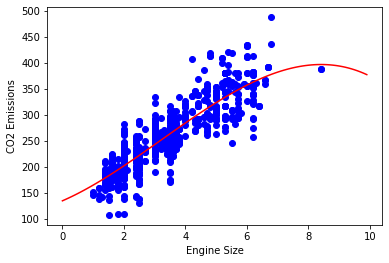

In [29]:
# Cubic Polynomial Regression
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print('Coefficients: ', clf.coef_)
print('Intercepts: ', clf.intercept_)

# Plot to observer fit
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2) + clf.coef_[0][3]*np.power(XX,3)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

# Model Evaluation
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum of Squares: %.2f" % np.mean(test_y_ - test_y)**2)
print("R2-score: %.2f" % r2_score(test_y_ , test_y))